# Problem

The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [1]:
import pandas as pd

In [2]:
df_raw=pd.read_csv('petrol_consumption.csv')

In [3]:
df_raw

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


# Splitting the test and train data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
Y=df_raw["Petrol_Consumption"]#target variable

In [6]:
X=df_raw.iloc[:,0:4]#input variable 

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [8]:
X_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
3,7.5,4870,2351,0.529
1,9.0,4092,1250,0.572
29,9.0,3601,4650,0.493
43,7.0,3745,2611,0.508
21,8.0,4983,602,0.602


In [9]:
Y_test


44    782
6     344
35    644
26    577
27    631
23    547
16    603
14    566
40    587
9     498
0     541
10    580
Name: Petrol_Consumption, dtype: int64

# Plotting the data

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
fig=plt.figure()
fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
ax=fig.add_subplot(projection='3d')

In [18]:
ax.scatter(X_train['Petrol_tax'],X_train['Average_income'],X_train['Population_Driver_licence(%)'],c=Y_train)

In [19]:
ax.X_lable='Petrol_Tax'

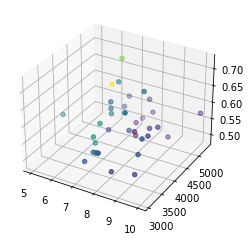

In [20]:
fig

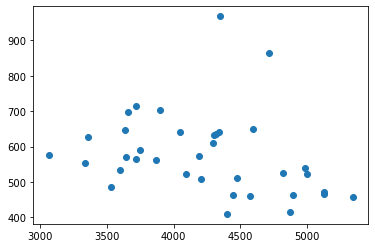

In [21]:
plt.scatter(X_train.Average_income,Y_train)

# Applying Machine Learning Algo(RandomForst)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
regressor=RandomForestRegressor(n_estimators=20)

In [24]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=20)

In [25]:
y_prd=regressor.predict(X_test)
y_prd

array([786.2 , 490.2 , 643.45, 575.65, 632.3 , 544.25, 561.85, 625.55,
       594.85, 517.85, 538.85, 480.35])

In [26]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':y_prd})

In [27]:
df

,Actual,Predicted
44,782,786.20
6,344,490.20
35,644,643.45
26,577,575.65
27,631,632.30
23,547,544.25
16,603,561.85
14,566,625.55
40,587,594.85
9,498,517.85


In [28]:
from sklearn.metrics import r2_score
import pandas as pd

In [29]:
r2_score(Y_test,y_prd)

0.6723116383810857

In [30]:
??r2_score